In [2]:
from gensim import models

file_f = open('D:/tugas-akhir/fnc-id/django_project/hoaxdetector/hoax/static/fakta_final.txt').read()
file_h = open('D:/tugas-akhir/fnc-id/django_project/hoaxdetector/hoax/static/hoax_final.txt').read()

list_f = file_f.split()
list_h = file_h.split()

sentence = models.doc2vec.LabeledSentence(
    words=list_f, tags=["SENT_fakta"])
sentence1 = models.doc2vec.LabeledSentence(
    words=list_h, tags=["SENT_hoax"])

sentences = [sentence, sentence1]
token_count = sum([len(sentence) for sentence in sentences])

class LabeledLineSentence(object):
    def __init__(self, filename):
        self.filename = filename
    def __iter__(self):
        for uid, line in enumerate(open(filename)):
            yield LabeledSentence(words=line.split(), labels=['SENT_%s' % uid])
            
model = models.Doc2Vec(dm=0, alpha=.025, min_alpha=.025, min_count=1)
model.build_vocab(sentences)


for epoch in range(10):
    model.train( sentences, total_examples = token_count, epochs = model.iter)
    model.alpha -= 0.002  # decrease the learning rate`
    model.min_alpha = model.alpha  # fix the learning rate, no decay
   

model.save("my_model.doc2vec")
model_loaded = models.Doc2Vec.load('my_model.doc2vec')


#print(model.docvecs.most_similar(["SENT_hoax"])[0][1])
#print(model.docvecs.most_similar(["SENT_fakta"]))
#print(model_loaded.docvecs.most_similar(["SENT_hoax"]))
print(model.docvecs["SENT_hoax"])

#word_vec = model['pesan']
#model.docvecs.most_similar([word_vec])
#print("fakta")
#print(model.docvecs["SENT_fakta"])


C:\Users\Ajeng\Anaconda2\lib\site-packages\gensim-2.0.0-py2.7-win-amd64.egg\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[ 0.01523711 -0.40205851 -0.46198496 -0.32443777  0.16722381  0.15315838
  0.08746828  0.09156697  0.45953196  0.25941119  0.33034101  0.36884776
  0.47349748  0.23991725 -0.50860912  0.43801695  0.33455369  0.0175426
 -0.41428712 -0.11569469 -0.00674956  0.39745039  0.42365643 -0.04921221
 -0.39883873 -0.02848996 -0.3959851   0.11204337 -0.11656392 -0.32274681
 -0.10802058 -0.31831875  0.25080645 -0.46042556  0.12623976  0.48157156
  0.12285204  0.27920583  0.01520913  0.2020705   0.20901591 -0.15821452
  0.17356248 -0.25086224  0.14942589  0.03131629  0.38010907 -0.08895073
 -0.17785747  0.0675818  -0.25531399 -0.10636146 -0.39047581 -0.09004172
 -0.09102983 -0.25091884  0.0625947   0.48491672  0.05255491 -0.48121735
 -0.12322745  0.43204463 -0.51613557 -0.39378548  0.03069353  0.04597603
  0.18201649 -0.30438042  0.24316128  0.31662333  0.13337126  0.51639277
  0.17428379 -0.14163962  0.02954982 -0.31516662 -0.16843     0.34063727
  0.02666695  0.26355788  0.22736081  0.50486338  0.

In [3]:
import numpy as np
new_mat = np.vstack((model.docvecs["SENT_hoax"], model.docvecs["SENT_fakta"]))
np.shape(new_mat)

(2L, 100L)

In [10]:
from sklearn.preprocessing import StandardScaler
x_new = StandardScaler().fit_transform(new_mat)


(2L, 100L)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_new)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
new_pca = pca.transform(x_new)
print("original shape:   ", new_mat.shape)
print("transformed shape:", new_pca.shape)
new_pca

('original shape:   ', (2L, 100L))
('transformed shape:', (2L, 2L))


array([[ -1.00000001e+01,   1.68090464e-15],
       [  1.00000001e+01,  -1.68090464e-15]])

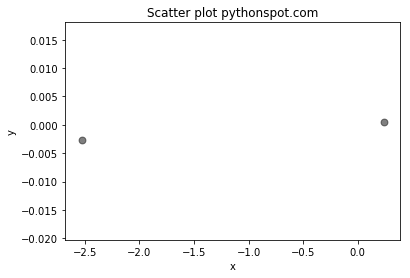

In [7]:
import matplotlib.pyplot as plt
N = 5
x = new_pca[0]
y = new_pca[1]
colors = (0,0,0)
area = np.pi*15
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()